# Step 1 - Load the data set

* After loading the dataset, we select the 3rd and 4th columns which will be our X1, X2 attributes respectively and the 9th column which provides the output-response y. 

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

import pandas as pd
import numpy as np
results = []
with open('DataSet2.txt') as inputfile:
    for line in inputfile:
        results.append(line.strip().split(';'))
    print(results[0:10])

data = pd.DataFrame(results, columns = list("abcdefghi"))
data = data.drop(['a', 'b'], 1)
data = data.drop(data.index[0])
data = data[['c', 'd', 'i']]
data = data[(data[['c','d','i']] != '?').all(axis=1)]
data



Saving DataSet2.txt to DataSet2.txt
User uploaded file "DataSet2.txt" with length 132960755 bytes
[['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], ['16/12/2006', '17:24:00', '4.216', '0.418', '234.840', '18.400', '0.000', '1.000', '17.000'], ['16/12/2006', '17:25:00', '5.360', '0.436', '233.630', '23.000', '0.000', '1.000', '16.000'], ['16/12/2006', '17:26:00', '5.374', '0.498', '233.290', '23.000', '0.000', '2.000', '17.000'], ['16/12/2006', '17:27:00', '5.388', '0.502', '233.740', '23.000', '0.000', '1.000', '17.000'], ['16/12/2006', '17:28:00', '3.666', '0.528', '235.680', '15.800', '0.000', '1.000', '17.000'], ['16/12/2006', '17:29:00', '3.520', '0.522', '235.020', '15.000', '0.000', '2.000', '17.000'], ['16/12/2006', '17:30:00', '3.702', '0.520', '235.090', '15.800', '0.000', '1.000', '17.000'], ['16/12/2006', '17:31:00', '3.700', '0.520', '235.220', '15.800', '0.000', '1.000', '

,c,d,i
1,4.216,0.418,17.000
2,5.360,0.436,16.000
3,5.374,0.498,17.000
4,5.388,0.502,17.000
5,3.666,0.528,17.000
6,3.520,0.522,17.000
7,3.702,0.520,17.000
8,3.700,0.520,17.000
9,3.668,0.510,17.000
10,3.662,0.510,16.000


#  Some preprocessing

* Here, we assign float values to our dataframe's content and find the minimum and maximum values of each one of the **X1** and **X2** attributes.

In [3]:
L_float = data.as_matrix(columns=None)
#Convert all values to float.
data3D = L_float.astype(np.float)
print(data3D.shape)

#Find min, max values for both attributes.
lim1=data3D[:,0].min()
print(lim1)

lim2=data3D[:,0].max()
print(lim2)

print()

lim3=data3D[:,1].min()
print(lim3)

lim4=data3D[:,1].max()
print(lim4)


(2049280, 3)
0.076
11.122
()
0.0
1.39


* Next, we generate our new query data set, where the query's attributes **X1**, **X2** and **z** are randomly chosen from a **Uniform distribution**. That is, X1~*U(lim1, lim2)*, *X2~U(lim3, lim4)* and z~U(0, 0.05*(lim2-lim1) + 0.05*(lim4-lim3)).


In [4]:
import random
import numpy as np

#Generate X1,X2,z using random uniform distribution.
X1 = np.random.uniform(lim1, lim2, 200)
X2 = np.random.uniform(lim3, lim4, 200)
z = np.random.uniform(0.01*(lim2-lim1) + 0.01*(lim4-lim3), 0.05*(lim2-lim1) + 0.05*(lim4-lim3), 200)

print(X1)
print()
print(X2)
print()
print(z)


[ 9.91231462  9.55965821  6.29888422  5.11604968 10.07189601  5.21114082
  4.71988802  0.27900184  5.97906607  4.61870861  6.69875304  0.38151075
  6.60020341  2.98560447  7.44434246  4.48429876  5.46601122  5.11882369
  5.10092248  0.63939485  6.72394712  0.12426818  1.22469041  6.89364831
  0.22509889  1.44254925  0.09908153  2.430544    8.10959971  5.82844775
  1.81633858  2.1640455   3.08526343  4.10405491  4.93661583 10.89461254
  6.04435967  0.52052788  5.72638833  3.48874746  1.79798635  8.63779668
  0.87620324  0.32268026  1.07469702  6.97794844  3.20361308  3.01600371
  2.42728029  8.30686405  4.95123674  8.05932395  5.75862102  6.09059936
  8.5635332   7.78825013  6.93759341 10.77906458  1.60125598  4.03413524
  9.03957306  1.86609142  9.83731951  3.96466195  5.44155073  5.21666436
  5.86675296  7.10521516  3.76745242  3.01049842  9.2914159   8.52681387
  2.58781051  4.46039497  3.61567119  3.35482385  3.97972027  0.7104593
  7.4053402   9.7612787   6.79751502  3.70728469  3.

* We **merge** the lists of X1, X2 and z into one array

In [5]:
X1_flattened = (X1.T).ravel()
X2_flattened = (X2.T).ravel()
QA_dataset = np.empty((len(X1),4))
QA_dataset[:,0] = X1_flattened
QA_dataset[:,1] = X2_flattened
QA_dataset[:,2] = z
QA_dataset[:,3] = 0
print(QA_dataset)


[[9.91231462e+00 8.67840497e-01 6.08519264e-01 0.00000000e+00]
 [9.55965821e+00 1.16906808e+00 1.31165086e-01 0.00000000e+00]
 [6.29888422e+00 5.70661849e-01 1.81454876e-01 0.00000000e+00]
 [5.11604968e+00 1.07580275e+00 2.20819274e-01 0.00000000e+00]
 [1.00718960e+01 5.90718192e-02 1.96254593e-01 0.00000000e+00]
 [5.21114082e+00 8.40869451e-01 1.32570951e-01 0.00000000e+00]
 [4.71988802e+00 1.36387708e+00 4.41080960e-01 0.00000000e+00]
 [2.79001838e-01 9.95779900e-01 4.31713762e-01 0.00000000e+00]
 [5.97906607e+00 4.67574005e-01 6.16090673e-01 0.00000000e+00]
 [4.61870861e+00 1.29359366e+00 3.86099282e-01 0.00000000e+00]
 [6.69875304e+00 9.52130243e-01 5.53012878e-01 0.00000000e+00]
 [3.81510749e-01 3.16969239e-01 4.02024886e-01 0.00000000e+00]
 [6.60020341e+00 3.16967103e-01 5.29427312e-01 0.00000000e+00]
 [2.98560447e+00 5.12101246e-01 4.10400377e-01 0.00000000e+00]
 [7.44434246e+00 1.14217957e+00 5.55545087e-01 0.00000000e+00]
 [4.48429876e+00 8.10360806e-01 4.15173273e-01 0.000000

# Step 2 - Training the Model

* Here we **calculate** the true answers of QA_dataset array, based on the downloaded dataset data3D.
For this purpose, we use the *calculate_y()* function.

In [6]:
def calculate_y(query_data, data):
  average_y = []   
  #We populate the list
  for validation_datapoint in query_data:
    y, y_final = [], []
    iter=0
    for query_datapoint in data:
      #Check if the incoming datapoint satisfies the condition, according to which it's distance from the validation datapoint is smaller or equal,
      #to the radius z of the circle with center C(X1,X2), where validation_datapoint q=[X1,X2,z].
      if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]**2):
        y.append(query_datapoint[2])
        iter+=1
    #If there is no data point assigned to our query, increase (double) the radius. 
    if iter == 0:
      y = []
      for query_datapoint in data:
        if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]):
          y.append(query_datapoint[2])
          iter+=1  
    #If, still there is no data point assigned to our query, increase (double) the radius.
    if iter == 0:
      y = []
      for query_datapoint in data:
        if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]**(1/2)):
          y.append(query_datapoint[2])
          iter+=1
    y_final = np.asarray(y)  
    #Calculate the average value of y.
    average_y.append(np.mean(y_final, axis=0))  
  return(average_y)    
            
        
      
#Run the algorithm.      
x_list = calculate_y(QA_dataset, data3D[1:2000000])
#print(x_list)
#In case there is a query that did not match to any datapoint from data3D, to avoid error in calculations due to NaN, we set 0 value.
x_array = np.asarray(x_list)
replace = np.isnan(x_array)
x_array[replace] = 0
#We store y in the list, real_y.
real_y = x_array
print(real_y)


[16.66666667 16.         14.78099174 17.33333333 11.         17.06896552
 14.5         0.42857143 15.51613686 15.36842105 15.97666667  0.41675106
 15.36764262 13.30881437 17.         14.6681338  11.         15.97560976
 18.          0.74081824 15.34836066  0.48417954 11.02764208 16.18478261
  0.42095459 10.01322007  0.50858451 14.47092062 16.71428571 15.64727463
 14.85939435 12.8357203  18.16666667 14.91829135 15.20853333 16.25
 14.15819209  0.6        15.70204664 14.81273969 11.71424222 16.75
  4.29986217  0.56701031 10.46189319 17.5        13.87122206 13.3169413
 13.05521708 16.5        24.66666667 16.5        14.91428571 17.5
 16.75       16.43636364 16.19701987 16.5         3.34104046 17.91666667
 15.41666667  9.62752294 16.         14.68266667 15.04706226 15.67619048
 15.69193286 15.68744435 14.66588005 12.70632911 16.04761905 16.77777778
 13.53938768 14.47995283 14.37128713 14.29844684 14.37340713  0.
 17.28571429 15.42424242 17.5        14.91002987 14.61196683 14.54129916
 16.25

* We **merge** the true answers **y** with the **X1**, **X2** and **z** attributes of the QA_dataset, into a new matrix of 4 columns with attributes X1, X2, z, y in incremental order.

In [7]:
QA_dataset[:,3] = real_y
print(QA_dataset[2:-1])

[[6.29888422e+00 5.70661849e-01 1.81454876e-01 1.47809917e+01]
 [5.11604968e+00 1.07580275e+00 2.20819274e-01 1.73333333e+01]
 [1.00718960e+01 5.90718192e-02 1.96254593e-01 1.10000000e+01]
 [5.21114082e+00 8.40869451e-01 1.32570951e-01 1.70689655e+01]
 [4.71988802e+00 1.36387708e+00 4.41080960e-01 1.45000000e+01]
 [2.79001838e-01 9.95779900e-01 4.31713762e-01 4.28571429e-01]
 [5.97906607e+00 4.67574005e-01 6.16090673e-01 1.55161369e+01]
 [4.61870861e+00 1.29359366e+00 3.86099282e-01 1.53684211e+01]
 [6.69875304e+00 9.52130243e-01 5.53012878e-01 1.59766667e+01]
 [3.81510749e-01 3.16969239e-01 4.02024886e-01 4.16751060e-01]
 [6.60020341e+00 3.16967103e-01 5.29427312e-01 1.53676426e+01]
 [2.98560447e+00 5.12101246e-01 4.10400377e-01 1.33088144e+01]
 [7.44434246e+00 1.14217957e+00 5.55545087e-01 1.70000000e+01]
 [4.48429876e+00 8.10360806e-01 4.15173273e-01 1.46681338e+01]
 [5.46601122e+00 1.29106180e+00 1.52215808e-01 1.10000000e+01]
 [5.11882369e+00 8.36311780e-01 2.68334031e-01 1.597560

* Here we apply **Principal Component Analysis** on QA_dataset and use the **RPCL** algorithm to cluster the new query-answer data set of 2 dimensions.

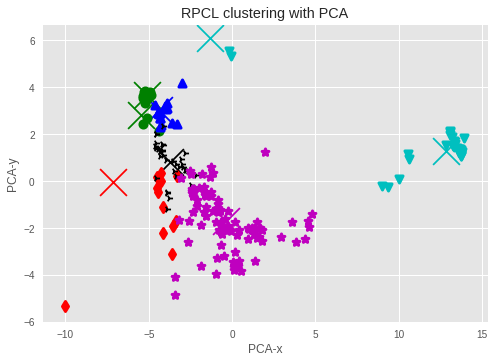

('\t\t', 'Cluster 1 has: 3 data points')
('\t\t', 'Cluster 2 has: 2 data points')
('\t\t', 'Cluster 3 has: 12 data points')
('\t\t', 'Cluster 4 has: 17 data points')
('\t\t', 'Cluster 5 has: 35 data points')
('\t\t', 'Cluster 6 has: 92 data points')
('\t\t', 'Cluster 7 has: 11 data points')
('\t\t', 'Cluster 8 has: 28 data points')


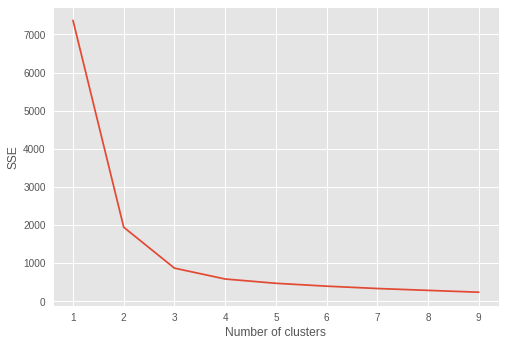

In [8]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
sklearn_pca_x = pca.fit_transform(QA_dataset)
#print(sklearn_pca_x)


markers = 5*["o", "v", "d", "^", "4", "*"]
colors = 5*["g", "c", "r", "b", "k", "m"]

#This function selects the second smallest number from a givn list of numbers. 
def second_smallest(numbers):
    a1, a2 = float('inf'), float('inf')
    for x in numbers:
        if x <= a1:
            a1, a2 = x, a1
        elif x < a2:
            a2 = x
    return a2
  
class K_Means:
    def __init__(self, k=8):
        self.k = k
        
    
    def fit(self,data):
        #Create empty dictionary
        self.centroids = {}
        
        #We iterate through data. For k=2, the 2 first "pairs" from the dataset are used as our initial centroids.
        for i in range(self.k):
            self.centroids[i] = data[-i]
        
        
        #for self.classifications dictionary, the centroids will be the keys and the featureset will be the values of those keys.
        self.classifications= {}
            
        #Create a list
        for i in range(self.k):
            self.classifications[i] = []
        iter=0
                   
        #We populate the list
        for featureset in data:
            iter+=1
            #Creates a list, populated with K number of values, where each value is the distance of a datapoint from each centroid.
            distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
            #We classify each datapoint with the index value of the minimum distance.
            classification = distances.index(min(distances))
            #Calculate 2nd closest centroid to the given datapoint.
            second_winner_distance = second_smallest(distances)                
            second_winner_centroid = distances.index(second_winner_distance)
            
            #Moving 1st winner centroid closer to the datapoint and rival centroid away from the datapoint.
            self.centroids[classification] = self.centroids[classification] + 0.1 * (featureset - self.centroids[classification])
            self.centroids[second_winner_centroid] = self.centroids[second_winner_centroid] - 0.025 * (featureset - self.centroids[second_winner_centroid])
           
            #In every iteration we add the datpoints assigned to each centroid, so that each centroid-key of the dictionary will have the according datapoints-keys assigned to it.
            self.classifications[classification].append(featureset)
           
            #If the formed cluster contains more than 99 datapoints (>=10% of total data), then we re-calculate it's centroid, by finding the average of all the classified datapoints.
            #If the formed cluster is relatively small (<=99), then the centroid will not be at the centre of the cluster but away from it.
            for classification in self.classifications:
                if (len(self.classifications[classification])>19):
                  self.centroids[classification] = np.average(self.classifications[classification], axis=0)
        

            
                    
    #This function is redundant, but we included it for completeness.                
    def predict(self,data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

#We call the fit() fucntion.
clf = K_Means()
clf.fit(sklearn_pca_x)

fig = plt.figure()

#Plot the centroids. 
for centroid in clf.centroids:
    color = colors[centroid]
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
               marker="x", color=color, s=720, linewidths=5)

#Plot the datapoints. Their color/shape depends on their classification.
for classification in clf.classifications:
    color = colors[classification]
    marker = markers[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker=marker, color=color, s=50, linewidths=3)

        
plt.title('RPCL clustering with PCA')
plt.xlabel('PCA-x')
plt.ylabel('PCA-y')         
plt.show()

print('\t\t','Cluster {no} has: {number} data points'.format(no=1, number=len(clf.classifications[0])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=2, number=len(clf.classifications[1])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=3, number=len(clf.classifications[2])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=4, number=len(clf.classifications[3])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=5, number=len(clf.classifications[4])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=6, number=len(clf.classifications[5])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=7, number=len(clf.classifications[6])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=8, number=len(clf.classifications[7])))

#Here we plot the Sum of distances of each cluster's datapoints from their respective centroid.
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(sklearn_pca_x)
    labels1 = kmeans.labels_
    
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center.
    
#The plot showcases the error with respect to the number of clusters for K-Means algorithm.
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("")
plt.show()

* We also apply **t-SNE** on QA_dataset and use the **RPCL** algorithm to cluster the new query-answer data set of 2 dimensions.

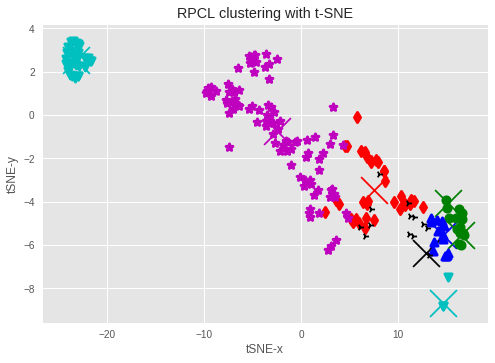

('\t\t', 'Cluster 1 has: 5 data points')
('\t\t', 'Cluster 2 has: 3 data points')
('\t\t', 'Cluster 3 has: 35 data points')
('\t\t', 'Cluster 4 has: 15 data points')
('\t\t', 'Cluster 5 has: 13 data points')
('\t\t', 'Cluster 6 has: 92 data points')
('\t\t', 'Cluster 7 has: 9 data points')
('\t\t', 'Cluster 8 has: 28 data points')


In [10]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(QA_dataset)

markers = 5*["o", "v", "d", "^", "4", "*"]
colors = 5*["g", "c", "r", "b", "k", "m"]

#This function selects the second smallest number from a givn list of numbers. 
def second_smallest(numbers):
    a1, a2 = float('inf'), float('inf')
    for x in numbers:
        if x <= a1:
            a1, a2 = x, a1
        elif x < a2:
            a2 = x
    return a2
  
class K_Means:
    def __init__(self, k=8):
        self.k = k
        
    
    def fit(self,data):
        #Create empty dictionary
        self.centroids = {}
        
        #We iterate through data. For k=2, the 2 first "pairs" from the dataset are used as our initial centroids.
        for i in range(self.k):
            self.centroids[i] = data[-i]
        
        
        #for self.classifications dictionary, the centroids will be the keys and the featureset will be the values of those keys.
        self.classifications= {}
            
        #Create a list
        for i in range(self.k):
            self.classifications[i] = []
        iter=0
                   
        #We populate the list
        for featureset in data:
            iter+=1
            #Creates a list, populated with K number of values, where each value is the distance of a datapoint from each centroid.
            distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
            #We classify each datapoint with the index value of the minimum distance.
            classification = distances.index(min(distances))
            #Calculate 2nd closest centroid to the given datapoint.
            second_winner_distance = second_smallest(distances)                
            second_winner_centroid = distances.index(second_winner_distance)
            
            #Moving 1st winner centroid closer to the datapoint and rival centroid away from the datapoint.
            self.centroids[classification] = self.centroids[classification] + 0.1 * (featureset - self.centroids[classification])
            self.centroids[second_winner_centroid] = self.centroids[second_winner_centroid] - 0.025 * (featureset - self.centroids[second_winner_centroid])
           
            #In every iteration we add the datpoints assigned to each centroid, so that each centroid-key of the dictionary will have the according datapoints-keys assigned to it.
            self.classifications[classification].append(featureset)
           
            #If the formed cluster contains more than 10 datapoints, then we re-calculate it's centroid, by finding the average of all the classified datapoints.
            #If the formed cluster is relatively small (<=10), then the centroid will not be at the centre of the cluster but away from it.
            for classification in self.classifications:
                if (len(self.classifications[classification])>19):
                  self.centroids[classification] = np.average(self.classifications[classification], axis=0)
        

            
                    
    #This function is redundant, but we included it for completeness.                
    def predict(self,data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

#We call the fit() fucntion.
clf = K_Means()
clf.fit(x_test_2d)

fig = plt.figure()

#Plot the centroids. 
for centroid in clf.centroids:
    color = colors[centroid]
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
               marker="x", color=color, s=720, linewidths=5)

#Plot the datapoints. Their color/shape depends on their classification.
for classification in clf.classifications:
    color = colors[classification]
    marker = markers[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker=marker, color=color, s=50, linewidths=3)

        
plt.title('RPCL clustering with t-SNE')
plt.xlabel('tSNE-x')
plt.ylabel('tSNE-y')         
plt.show()

print('\t\t','Cluster {no} has: {number} data points'.format(no=1, number=len(clf.classifications[0])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=2, number=len(clf.classifications[1])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=3, number=len(clf.classifications[2])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=4, number=len(clf.classifications[3])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=5, number=len(clf.classifications[4])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=6, number=len(clf.classifications[5])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=7, number=len(clf.classifications[6])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=8, number=len(clf.classifications[7])))

# Step 3 - Predicting the Answer

* First, we generate a small set of **100 queries** with 3 attributes: X1, X2 and z using the **Uniform distribution**.

In [21]:
import random
import numpy as np

#Generate 20 queries q=[X1,X2,z] with uniform distribution
X1 = np.random.uniform(lim1, lim2, 20)
X2 = np.random.uniform(lim3, lim4, 20)
z = np.random.uniform(0.01*(lim2-lim1) + 0.01*(lim4-lim3), 0.05*(lim2-lim1) + 0.05*(lim4-lim3), 20)


X1_flattened = (X1.T).ravel()
X2_flattened = (X2.T).ravel()
query = np.empty((len(X1),3))
query[:,0] = X1_flattened
query[:,1] = X2_flattened
query[:,2] = z


print(query)

[[8.35815029e+00 7.09538291e-01 6.01360073e-01]
 [1.64960262e+00 1.32996747e+00 4.96057391e-01]
 [1.00551029e+00 1.27235701e+00 3.43532699e-01]
 [2.53415514e+00 1.12550157e+00 2.08045666e-01]
 [3.72622304e+00 4.11403994e-01 1.97240957e-01]
 [3.80611512e+00 8.14021979e-01 4.70244659e-01]
 [9.73886327e+00 1.36130870e+00 3.61402716e-01]
 [2.24782511e+00 1.19137759e+00 3.93206688e-01]
 [7.36648194e+00 1.30481385e+00 2.59516579e-01]
 [1.00633832e+01 1.36392335e-01 3.93377991e-01]
 [6.72136354e+00 6.86410479e-01 3.43224129e-01]
 [5.96581222e+00 2.16142862e-01 5.99670281e-01]
 [5.44282903e-01 5.01048885e-01 3.86363293e-01]
 [3.27908555e+00 5.56328587e-03 1.95834177e-01]
 [3.34811122e+00 3.26236480e-01 4.37238161e-01]
 [4.85365167e+00 6.29523444e-01 4.40818201e-01]
 [6.33258555e+00 1.14757517e+00 2.61468599e-01]
 [5.79305808e+00 1.37188213e+00 2.43681256e-01]
 [3.11131576e+00 3.02584812e-01 2.71722513e-01]
 [6.88257984e+00 8.72078752e-01 5.42844036e-01]]


* Same as in the Training phase of our model, here we **calculate** the true answers to our 20 new queries, based on the QA_dataset which we generated based on the downloaded data set.
For this purpose, we use the *calculate_y()* function.

In [22]:
def calculate_y_new(query_data, data):
  average_y = []   
  #We populate the list
  for validation_datapoint in query_data:
    y, y_final = [], []
    iter=0
    for query_datapoint in data:
      #Check if the incoming datapoint satisfies the condition, according to which it's distance from the validation datapoint is smaller or equal,
      #to the radius z of the circle with center C(X1,X2), where validation_datapoint q=[X1,X2,z].
      if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]**2):
        y.append(query_datapoint[3])
        iter+=1
    if iter == 0:
      y = []
      for query_datapoint in data:
        if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]):
          y.append(query_datapoint[3])
          iter+=1  
    if iter == 0:
      y = []
      for query_datapoint in data:
        if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]**(1/2)):
          y.append(query_datapoint[3])
          iter+=1
    y_final = np.asarray(y)  
    #Calculate the average value of y.
    average_y.append(np.mean(y_final, axis=0))  
  return(average_y)    
            
        
      
      
#Run the algorithm.      
x_list = calculate_y_new(query, QA_dataset)
#print(x_list)
#In case there is a query that did not match to any datapoint from QA_dataset, to avoid error in calculations due to NaN, we set 0 value.
x_array = np.asarray(x_list)
replace = np.isnan(x_array)
x_array[replace] = 0
#We store y in the list, real_y.
real_y = x_array
print(real_y)

[16.59974747  5.66489256  0.52575569 16.8230384  14.49900651 14.69078551
 16.         14.69       17.20634921 13.95721501 16.11948971 15.46695528
  1.15868274 14.29844684 14.13458779 15.24477524 15.57692308 15.2173913
 13.64031506 16.33480734]


* For the final part of the prediction phase, we use the *fit()* function to cluster the QA_dataset and we **predict** the answer-response for each query from the 100 queries, which we generated for evaluation, by classifying them to the clusters they belong to and assigning the cluster's centroid response, to the query's predicted response.


In [23]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

markers = 5*["o", "v", "d", "^", "4", "*"]
colors = 5*["g", "c", "r", "b", "k", "m"]

#This function selects the second smallest number from a given list of numbers. 
def second_smallest(numbers):
    a1, a2 = float('inf'), float('inf')
    for x in numbers:
        if x <= a1:
            a1, a2 = x, a1
        elif x < a2:
            a2 = x
    return a2
  
class K_Means:
    def __init__(self, k=4):
        self.k = k
        
    
    def fit(self,data):
        #Create empty dictionary
        self.centroids = {}
        
        #We iterate through data. For k=2, the 2 first "pairs" from the dataset are used as our initial centroids.
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        
        #for self.classifications dictionary, the centroids will be the keys and the featureset will be the values of those keys.
        self.classifications= {}
            
        #Create a list
        for i in range(self.k):
            self.classifications[i] = []
        iter=0
                   
        #We populate the list
        for featureset in data:
            iter+=1
            #Creates a list, populated with K number of values, where each value is the distance of a datapoint from each centroid.
            distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
            #We classify each datapoint with the index value of the minimum distance.
            classification = distances.index(min(distances))
            #Calculate 2nd closest centroid to the given datapoint.
            second_winner_distance = second_smallest(distances)                
            second_winner_centroid = distances.index(second_winner_distance)
            
            #Moving 1st winner centroid closer to the datapoint and rival centroid away from the datapoint.
            self.centroids[classification] = self.centroids[classification] + 0.1 * (featureset - self.centroids[classification])
            self.centroids[second_winner_centroid] = self.centroids[second_winner_centroid] - 0.025 * (featureset - self.centroids[second_winner_centroid])
           
            #In every iteration we add the datpoints assigned to each centroid, so that each centroid-key of the dictionary will have the according datapoints-keys assigned to it.
            self.classifications[classification].append(featureset)
           
            #If the formed cluster contains more than 10 datapoints, then we re-calculate it's centroid, by finding the average of all the classified datapoints.
            #If the formed cluster is relatively small (<=10), then the centroid will not be at the centre of the cluster but away from it.
            for classification in self.classifications:
                if (len(self.classifications[classification])>99):
                  self.centroids[classification] = np.average(self.classifications[classification], axis=0)
        

            
                    
    #This function is redundant, but we included it for completeness.                
    def predict(self,data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
        
    
clf = K_Means()
clf.fit(QA_dataset)

#In pred_y list we store all the predicted answers y for every query, generated for validation.
pred_y = []
for query_data in query:
  print('Query: {number}'.format(number=query_data))
  #We calculate the Euclidean distance of the query's attributes (X1,X2) from the centroid's attributes (X1,X2). 
  #We do not know the query's answer, so we cannot include the y response value in the Eeclidean distance calculation.
  distances = [np.linalg.norm(query_data[0:1] - clf.centroids[centroid][0:1]) for centroid in clf.centroids]
  prediction = distances.index(min(distances))
  print('Predicted Cluster: {number}'.format(number=prediction))
  s = np.asarray(clf.classifications[prediction])
  predicted_y = np.average(s, axis=0)[3]
  pred_y.append(predicted_y)
  print('---------------------------')
print('List of all the predicted answers y: {number}'.format(number=pred_y))




Query: [8.35815029 0.70953829 0.60136007]
Predicted Cluster: 3
---------------------------
Query: [1.64960262 1.32996747 0.49605739]
Predicted Cluster: 2
---------------------------
Query: [1.00551029 1.27235701 0.3435327 ]
Predicted Cluster: 2
---------------------------
Query: [2.53415514 1.12550157 0.20804567]
Predicted Cluster: 2
---------------------------
Query: [3.72622304 0.41140399 0.19724096]
Predicted Cluster: 3
---------------------------
Query: [3.80611512 0.81402198 0.47024466]
Predicted Cluster: 3
---------------------------
Query: [9.73886327 1.3613087  0.36140272]
Predicted Cluster: 3
---------------------------
Query: [2.24782511 1.19137759 0.39320669]
Predicted Cluster: 2
---------------------------
Query: [7.36648194 1.30481385 0.25951658]
Predicted Cluster: 3
---------------------------
Query: [10.06338322  0.13639233  0.39337799]
Predicted Cluster: 3
---------------------------
Query: [6.72136354 0.68641048 0.34322413]
Predicted Cluster: 3
------------------------

# Step 4 - Evaluating the results

* Here, we calulate the **Average Means Squared Error** between the true answer y and the predicted answer y' for our generated queries.

In [24]:
error = np.sum((pred_y - real_y)**2)
average_means_squared_error = np.sqrt(error)/(len(real_y))
print('RMSE = {number}'.format(number=average_means_squared_error))

RMSE = 0.844352240518


* The **Normalised Average Means Squared Error** (NRMSE) between the true answer y and the predicted answer y' for our generated queries is calculated below.

In [25]:
average_y = np.average(real_y, axis=0)

enumerator = (pred_y - real_y)**2
denominator = (real_y - average_y)**2
normalised_average_means_squared_error = np.sum(np.sqrt(enumerator / denominator)) / len(real_y)

print('NRMSE = {number}'.format(number=normalised_average_means_squared_error))

NRMSE = 1.3536717362


In [26]:
error = np.sum(np.abs(pred_y - real_y))
mean_absolute_error = error/(len(real_y))
print('MAE = {number}'.format(number=mean_absolute_error))

MAE = 2.17386244589


* We calculate the **Average Means Squared Error** (RMSE) for different k values, for* k=3,4,...,16* and plot the graph.

For K = 3 the Predictive Error is 1.60612540841
For K = 4 the Predictive Error is 1.60459635493
For K = 5 the Predictive Error is 1.60459635493
For K = 6 the Predictive Error is 1.42489479561
For K = 7 the Predictive Error is 1.39932232038
For K = 8 the Predictive Error is 1.48964235963
For K = 9 the Predictive Error is 1.48964235963
For K = 10 the Predictive Error is 1.48960523967
For K = 11 the Predictive Error is 0.348266983028
For K = 12 the Predictive Error is 0.34150933408
For K = 13 the Predictive Error is 0.34150933408
For K = 14 the Predictive Error is 0.32644032802
For K = 15 the Predictive Error is 0.334667486274


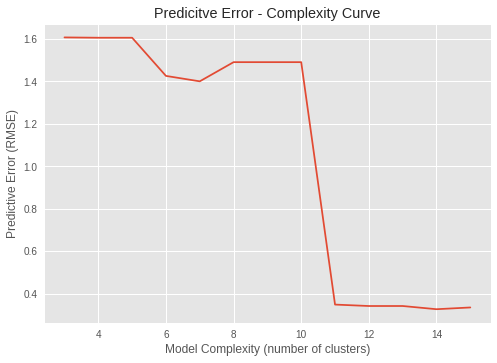

In [16]:
#We change the RPCL algorithm, to iterate over various k values.
def fit(k,data):
        #Create empty dictionary
        centroids = {}
        
        #We iterate through data. For k=2, the 2 first "pairs" from the dataset are used as our initial centroids.
        for i in range(k):
            centroids[i] = data[-i]
        
        
        #for self.classifications dictionary, the centroids will be the keys and the featureset will be the values of those keys.
        classifications= {}
            
        #Create a list
        for i in range(k):
            classifications[i] = []
        iter=0
                   
        #We populate the list
        for featureset in data:
            iter+=1
            #Creates a list, populated with K number of values, where each value is the distance of a datapoint from each centroid.
            distances = [np.linalg.norm(featureset - centroids[centroid]) for centroid in centroids]
            #We classify each datapoint with the index value of the minimum distance.
            classification = distances.index(min(distances))
            #Calculate 2nd closest centroid to the given datapoint.
            second_winner_distance = second_smallest(distances)                
            second_winner_centroid = distances.index(second_winner_distance)
            
            #Moving 1st winner centroid closer to the datapoint and rival centroid away from the datapoint.
            centroids[classification] = centroids[classification] + 0.1 * (featureset - centroids[classification])
            centroids[second_winner_centroid] = centroids[second_winner_centroid] - 0.025 * (featureset - centroids[second_winner_centroid])
           
            #In every iteration we add the datpoints assigned to each centroid, so that each centroid-key of the dictionary will have the according datapoints-keys assigned to it.
            classifications[classification].append(featureset)
           
            #If the formed cluster contains more than 10 datapoints, then we re-calculate it's centroid, by finding the average of all the classified datapoints.
            #If the formed cluster is relatively small (<=10), then the centroid will not be at the centre of the cluster but away from it.
            for classification in classifications:
                if (len(classifications[classification])>19):
                  centroids[classification] = np.average(classifications[classification], axis=0)
            return centroids
          
complexity = list()    
temp = list()       
for k in range(3,16):
  clf = fit(k, QA_dataset)
  pred_y = []
  for query_data in query:
    #We calculate the Euclidean distance of the query's attributes (X1,X2) from the centroid's attributes (X1,X2). 
    #We do not know the query's answer, so we cannot include the y response value in the Eeclidean distance calculation.
    distances = [np.linalg.norm(query_data[0:1] - clf[centroid][0:1]) for centroid in clf]
    prediction = distances.index(min(distances))
    s = clf[prediction]
    predicted_y = s[3]
    pred_y.append(predicted_y)
    
  error = np.sum((pred_y - real_y)**2)
  average_means_squared_error = np.sqrt(error)/(len(real_y))
  temp.append(average_means_squared_error)
  complexity.append(k)
  print('For K = {clusters} the Predictive Error is {number}'.format(clusters=k, number=average_means_squared_error))

plt.figure()
plt.plot(complexity, temp)
plt.xlabel("Model Complexity (number of clusters)")
plt.ylabel("Predictive Error (RMSE)")
plt.title("Predicitve Error - Complexity Curve")
plt.show()